### Import pakietów

In [1]:
import numpy as np
from statistics import multimode
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

## Część pierwsza
### Funkcje pomocnicze

In [2]:
def check_params(X, y, Z, k, p = 2):
    # funkcja pomocnicza sprawdzająca poprawność parametrów wejściowych
    c = len(X[0]) # ile cech obserwujemy (kolumny)
    n = len(X) # ile obserwacji w X
    m = len(Z) # ile obserwacji w Z
    assert isinstance(X, list) and all(isinstance(row, list) for row in X) and all(len(row) == c for row in X) and np.isrealobj(X), "X musi być macierzą rzeczywistą"
    assert isinstance(y, list) and len(y) == n, "lista y musi mieć tyle samo obserwacji, co X"
    assert isinstance(Z, list) and all(isinstance(row, list) for row in Z) and all(len(row) == c for row in Z) and np.isrealobj(Z), "Z musi być macierzą rzeczywistą"
    assert isinstance(k, int) and 1 <= k <= n, "k musi być liczbą całkowitą z przedziału [1, n]"
    assert (isinstance(p, int) and p >= 1) or (isinstance(p, float) and p >= 1) or p == 'infty', "p musi być liczbą rzeczywistą większą od 1, równą 1 lub przyjmować wartość 'infty'"
    return True

In [3]:
def lp_distance(a, b, p):
    # funkcja pomocnicza obliczająca odległości w metryce Lp
    if p == 'infty':
        distance = max(abs(v - w) for v, w in zip(a, b))
        return distance
    else:
        distance = sum(abs(v - w) ** p for v, w in zip(a, b)) ** (1 / p)
        return distance

### Implementacja algorytmu k najbliższych sąsiadów


In [4]:
def knn(X, y, Z, k, p = 2):
    # implementacja algorytmu k najbliższych sąsiadów
    # zakładamy, że nie ma braków danych i że dane są na jednej skali 
    if not check_params(X, y, Z, k, p):
        return

    c = len(X[0]) # ile cech obserwujemy (kolumny)
    n = len(X) # ile obserwacji w X
    m = len(Z) # ile obserwacji w Z
    w = [None for i in range(m)]

    for i in range(m):
        # d - wektor odległości od każdego z wierszy X
        d = [None for a in range(n)]
        for j in range(n):
            d[j] = (lp_distance(Z[i], X[j], p))

        # dla danej obserwacji z Z znajdujemy indeksy k najbliższych punktów z X
        sorted_indexes = sorted(range(n), key=lambda i: d[i], reverse=False)
        which_nearest = sorted_indexes[:k]

        # wyznaczamy ciąg etykiet k najbliższych sąsiadów i szukamy wartości najczęściej występującej
        nearest_categories = [y[index] for index in which_nearest]
        modes = multimode(nearest_categories)
        chosen_mode = random.choice(modes)

        w[i] = chosen_mode
    return w


## Część druga

### Tożsame próby ucząca i testowa

In [5]:
# generujemy losowy problem klasyfikacji
X, y = make_classification(n_samples=50, n_features=2, n_redundant=0, random_state=3141592)

In [6]:
X = X.tolist()
y = y.tolist()

In [7]:
# 1-nn z metryką L1
res = knn(X, y, X, 1, 1)
print(res == y)

True


In [8]:
# 1-nn z metryką L2
res = knn(X, y, X, 1)
print(res == y)

True


In [9]:
# 1-nn z metryką L nieskończoność
res = knn(X, y, X, 1, 'infty')
print(res == y)

True


### Ilustracja poszukiwania najbliższych sąsiadów

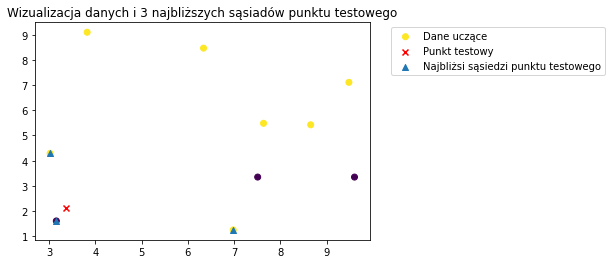

In [37]:
# Losowe punkty w dwuwymiarowej przestrzeni
random.seed(320584)
X_train = [[random.uniform(0, 10), random.uniform(0, 10)] for _ in range(10)]
y_train = [random.choice([0, 1]) for _ in range(10)]
X_test = [[random.uniform(0, 10), random.uniform(0, 10)]]

# Przykład użycia funkcji knn() dla metryki L2
k = 3
prediction = knn(X_train, y_train, X_test, k, 2)

# Wizualizacja danych i najbliższych sąsiadów
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train], c = y_train, marker='o', label='Dane uczące')
plt.scatter([x[0] for x in X_test], [x[1] for x in X_test], c='red', marker='x', label='Punkt testowy')


# Zaznaczanie najbliższych sąsiadów
for i, test_point in enumerate(X_test):
    distances = [lp_distance(test_point, train_point, 2) for train_point in X_train]
    nearest_indices = sorted(range(len(distances)), key=lambda k: distances[k])[:k]
    nearest_neighbors = [X_train[i] for i in nearest_indices]
    plt.scatter([x[0] for x in nearest_neighbors], [x[1] for x in nearest_neighbors], marker='^', label=f'Najbliżsi sąsiedzi punktu testowego')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(f'Wizualizacja danych i {k} najbliższych sąsiadów punktu testowego')
plt.savefig('obrazeczek.pdf', format = 'pdf', bbox_inches='tight')

In [11]:
X_train

[[7.636668160920134, 5.484412244112163],
 [7.510217111394138, 3.349616567527004],
 [6.338657250016558, 8.469327221632675],
 [8.656652261697955, 5.425741650276641],
 [3.1542285519866367, 1.6074083275705142],
 [9.48407330945975, 7.110022179217407],
 [6.981134689754743, 1.2511105095317743],
 [3.020381288219994, 4.292365698781104],
 [3.8207989443780255, 9.09956455162935],
 [9.604926814678837, 3.348921061071101]]

In [12]:
y_train

[1, 0, 1, 1, 0, 1, 1, 1, 1, 0]

In [13]:
prediction

[1]

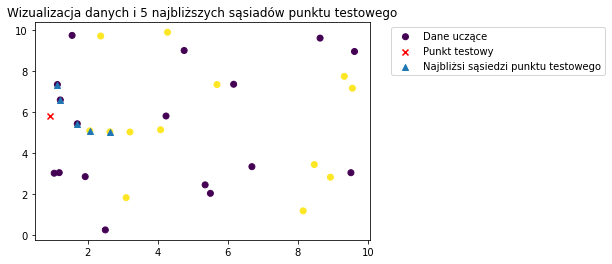

In [38]:
# Losowe punkty w dwuwymiarowej przestrzeni
random.seed(314159)
X_train = [[random.uniform(0, 10), random.uniform(0, 10)] for _ in range(30)]
y_train = [random.choice([0, 1]) for _ in range(30)]
X_test = [[random.uniform(0, 10), random.uniform(0, 10)]]

# Przykład użycia funkcji knn() dla metryki L2
k = 5
prediction = knn(X_train, y_train, X_test, k, 2)

# Wizualizacja danych i najbliższych sąsiadów
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train], c = y_train, marker='o', label='Dane uczące')
plt.scatter([x[0] for x in X_test], [x[1] for x in X_test], c='red', marker='x', label='Punkt testowy')


# Zaznaczanie najbliższych sąsiadów
for i, test_point in enumerate(X_test):
    distances = [lp_distance(test_point, train_point, 2) for train_point in X_train]
    nearest_indices = sorted(range(len(distances)), key=lambda k: distances[k])[:k]
    nearest_neighbors = [X_train[i] for i in nearest_indices]
    plt.scatter([x[0] for x in nearest_neighbors], [x[1] for x in nearest_neighbors], marker='^', label=f'Najbliżsi sąsiedzi punktu testowego')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(f'Wizualizacja danych i {k} najbliższych sąsiadów punktu testowego')
plt.savefig('obrazeczek2.pdf', format = 'pdf', bbox_inches='tight')

In [24]:
X_train

[[1.9236379321481523, 2.868424512347926],
 [1.1815528251671126, 3.062919199970693],
 [3.093436994522171, 1.8444279707476485],
 [5.689863980810021, 7.356997954444912],
 [2.054332755755933, 5.099949135665214],
 [1.5490505982693947, 9.753784820549745],
 [3.2026424261790662, 5.045136223451333],
 [6.687767450621024, 3.3556632918940976],
 [4.751080150277795, 9.016766972749586],
 [5.501377384406899, 2.0543066478852765],
 [8.930785665246088, 2.841894315820138],
 [2.630974244919541, 5.051200132743063],
 [6.1659702089509665, 7.372416106747915],
 [2.4986163753607213, 0.2713086138095877],
 [1.211858740677153, 6.60712060777882],
 [1.0371386474396271, 3.0353311961436216],
 [2.3657271691907256, 9.724257674907156],
 [1.128166775544146, 7.357633488719908],
 [9.619715715356563, 8.969118110565697],
 [1.6970261821214006, 5.445132620386602],
 [4.275449219262226, 9.907068554094385],
 [9.51730455333035, 3.06093752537795],
 [8.152735957996345, 1.1995139405945265],
 [4.077943049003643, 5.152365388049516],
 [8.

In [25]:
y_train

[0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0]

In [26]:
prediction

[0]

### Test dokładności na losowym problemie klasyfikacji

In [14]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, random_state=3141592)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3141592)

In [16]:
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [17]:
# Test dla różnych k i metryk
k = [1, 3, 5, 7]  
metryczki = [1, 2, 'infty'] 

for k in k:
    for metryczka in metryczki:
        y_pred_train = knn(X_train, y_train, X_train, k, metryczka)
        accuracy_train = round(accuracy_score(y_train, y_pred_train), 3)
        y_pred_test = knn(X_train, y_train, X_test, k, metryczka)
        accuracy_test = round(accuracy_score(y_test, y_pred_test), 3)

        
        print(f"k={k}, Metryka=L_{metryczka}, Dokładność na zbiorze treningowym={accuracy_train}, Dokładność na zbiorze testowym={accuracy_test}")

k=1, Metryka=L_1, Dokładność na zbiorze treningowym=1.0, Dokładność na zbiorze testowym=0.957
k=1, Metryka=L_2, Dokładność na zbiorze treningowym=1.0, Dokładność na zbiorze testowym=0.957
k=1, Metryka=L_infty, Dokładność na zbiorze treningowym=1.0, Dokładność na zbiorze testowym=0.953
k=3, Metryka=L_1, Dokładność na zbiorze treningowym=0.964, Dokładność na zbiorze testowym=0.97
k=3, Metryka=L_2, Dokładność na zbiorze treningowym=0.966, Dokładność na zbiorze testowym=0.973
k=3, Metryka=L_infty, Dokładność na zbiorze treningowym=0.963, Dokładność na zbiorze testowym=0.973
k=5, Metryka=L_1, Dokładność na zbiorze treningowym=0.957, Dokładność na zbiorze testowym=0.967
k=5, Metryka=L_2, Dokładność na zbiorze treningowym=0.959, Dokładność na zbiorze testowym=0.97
k=5, Metryka=L_infty, Dokładność na zbiorze treningowym=0.957, Dokładność na zbiorze testowym=0.973
k=7, Metryka=L_1, Dokładność na zbiorze treningowym=0.966, Dokładność na zbiorze testowym=0.97
k=7, Metryka=L_2, Dokładność na zbior

## Test dokładności na mniejszym zbiorze danych

In [18]:
X, y = make_classification(n_samples=50, n_features=2, n_redundant=0, random_state=3141592)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3141592)

In [20]:
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [21]:
# Test dla różnych k i metryk
k = [1, 3, 5, 7]  
metryczki = [1, 2, 'infty'] 

for k in k:
    for metryczka in metryczki:
        y_pred_train = knn(X_train, y_train, X_train, k, metryczka)
        accuracy_train = round(accuracy_score(y_train, y_pred_train), 3)
        y_pred_test = knn(X_train, y_train, X_test, k, metryczka)
        accuracy_test = round(accuracy_score(y_test, y_pred_test), 3)

        
        print(f"k={k}, Metryka=L_{metryczka}, Dokładność na zbiorze treningowym={accuracy_train}, Dokładność na zbiorze testowym={accuracy_test}")

k=1, Metryka=L_1, Dokładność na zbiorze treningowym=1.0, Dokładność na zbiorze testowym=0.867
k=1, Metryka=L_2, Dokładność na zbiorze treningowym=1.0, Dokładność na zbiorze testowym=0.867
k=1, Metryka=L_infty, Dokładność na zbiorze treningowym=1.0, Dokładność na zbiorze testowym=0.933
k=3, Metryka=L_1, Dokładność na zbiorze treningowym=0.943, Dokładność na zbiorze testowym=0.933
k=3, Metryka=L_2, Dokładność na zbiorze treningowym=0.943, Dokładność na zbiorze testowym=0.933
k=3, Metryka=L_infty, Dokładność na zbiorze treningowym=0.971, Dokładność na zbiorze testowym=0.933
k=5, Metryka=L_1, Dokładność na zbiorze treningowym=0.914, Dokładność na zbiorze testowym=0.867
k=5, Metryka=L_2, Dokładność na zbiorze treningowym=0.886, Dokładność na zbiorze testowym=0.867
k=5, Metryka=L_infty, Dokładność na zbiorze treningowym=0.857, Dokładność na zbiorze testowym=0.867
k=7, Metryka=L_1, Dokładność na zbiorze treningowym=0.829, Dokładność na zbiorze testowym=0.867
k=7, Metryka=L_2, Dokładność na zb